In [1]:
# Colab Setup
# If running in Google Colab, install the required library.
!pip install -q -Uqq nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.8 MB/s eta 0:00:00


In [3]:
!pip install -q dask[dataframe]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.7 MB/s eta 0:00:00


In [4]:
# Import necessary libraries
import pandas as pd
from nixtla import NixtlaClient

In [7]:
from google.colab import userdata
NIXTLA_API_KEY = userdata.get('NIXTLA_API_KEY')

In [8]:
# Initialize the NixtlaClient with your API key
# Replace 'your_api_key' with your actual Nixtla API key.
nixtla_client = NixtlaClient(api_key=NIXTLA_API_KEY)

In [9]:
# Load the dataset
# This dataset contains electricity prices for multiple markets in Europe.
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity-short.csv')

In [10]:
# Display the first few rows of the dataset
df.head()

,unique_id,ds,y
0,BE,2016-10-22 00:00:00,70.00
1,BE,2016-10-22 01:00:00,37.10
2,BE,2016-10-22 02:00:00,37.10
3,BE,2016-10-22 03:00:00,44.75
4,BE,2016-10-22 04:00:00,37.10


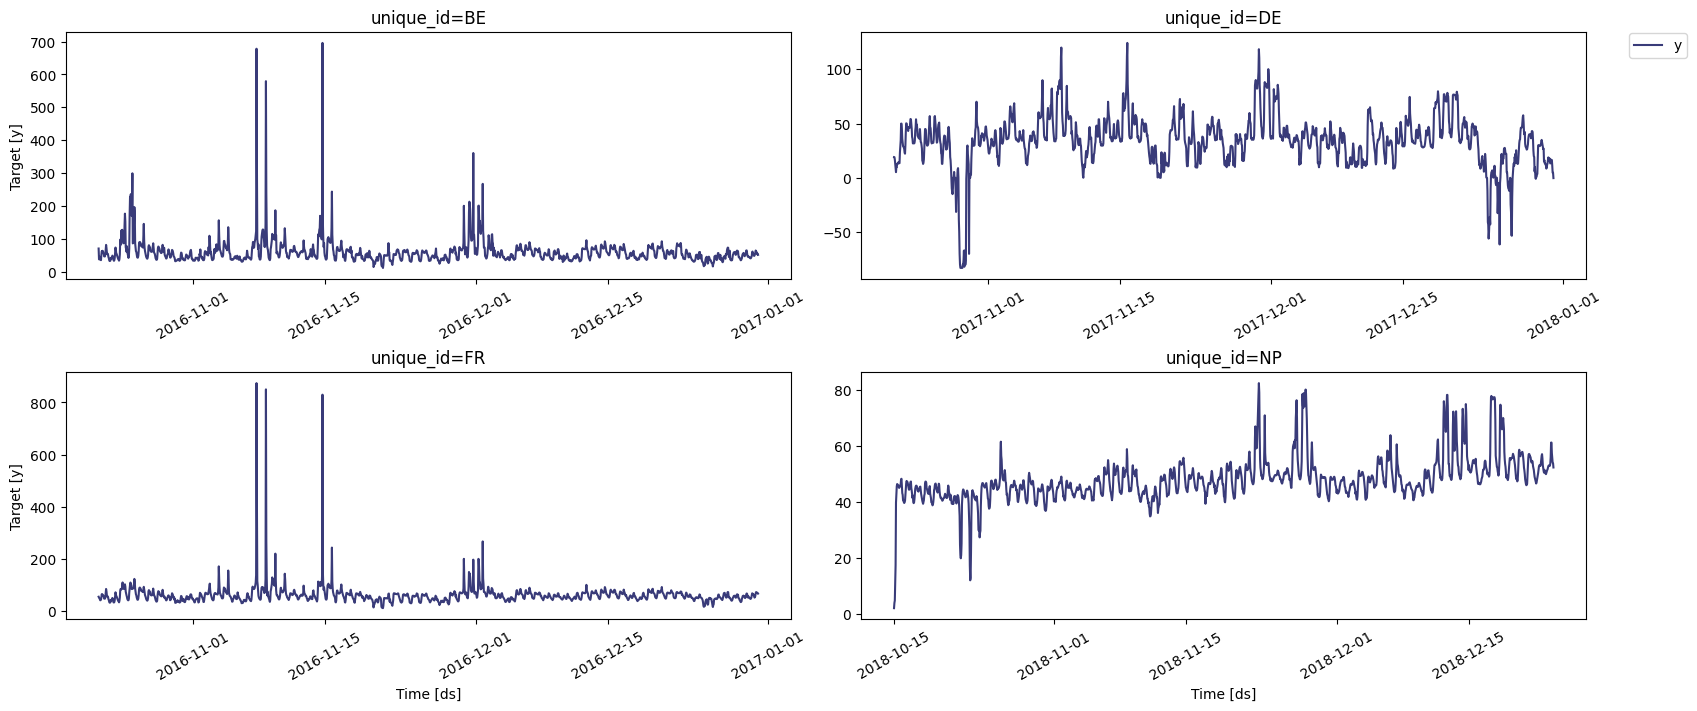

In [11]:
# Plot the time series data
# The `plot` method will provide a visualization of the data.
nixtla_client.plot(df)

In [12]:
# Forecasting Multiple Series
# Forecasting for all series at once using TimeGPT
# 'h' specifies the forecast horizon (24 hours in this case)
# 'level' specifies confidence intervals (80% and 90%)
timegpt_fcst_multiseries_df = nixtla_client.forecast(df=df, h=24, level=[80, 90])

In [13]:
# Display the forecast results
timegpt_fcst_multiseries_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,BE,2016-12-31 00:00:00,45.190582,54.872547,57.369880,35.508617,33.011284
1,BE,2016-12-31 01:00:00,43.244987,51.113632,56.101440,35.376343,30.388530
2,BE,2016-12-31 02:00:00,41.958897,48.577106,54.632140,35.340687,29.285654
3,BE,2016-12-31 03:00:00,39.796680,47.265990,49.683876,32.327370,29.909485
4,BE,2016-12-31 04:00:00,39.204865,47.411090,47.677826,30.998638,30.731903


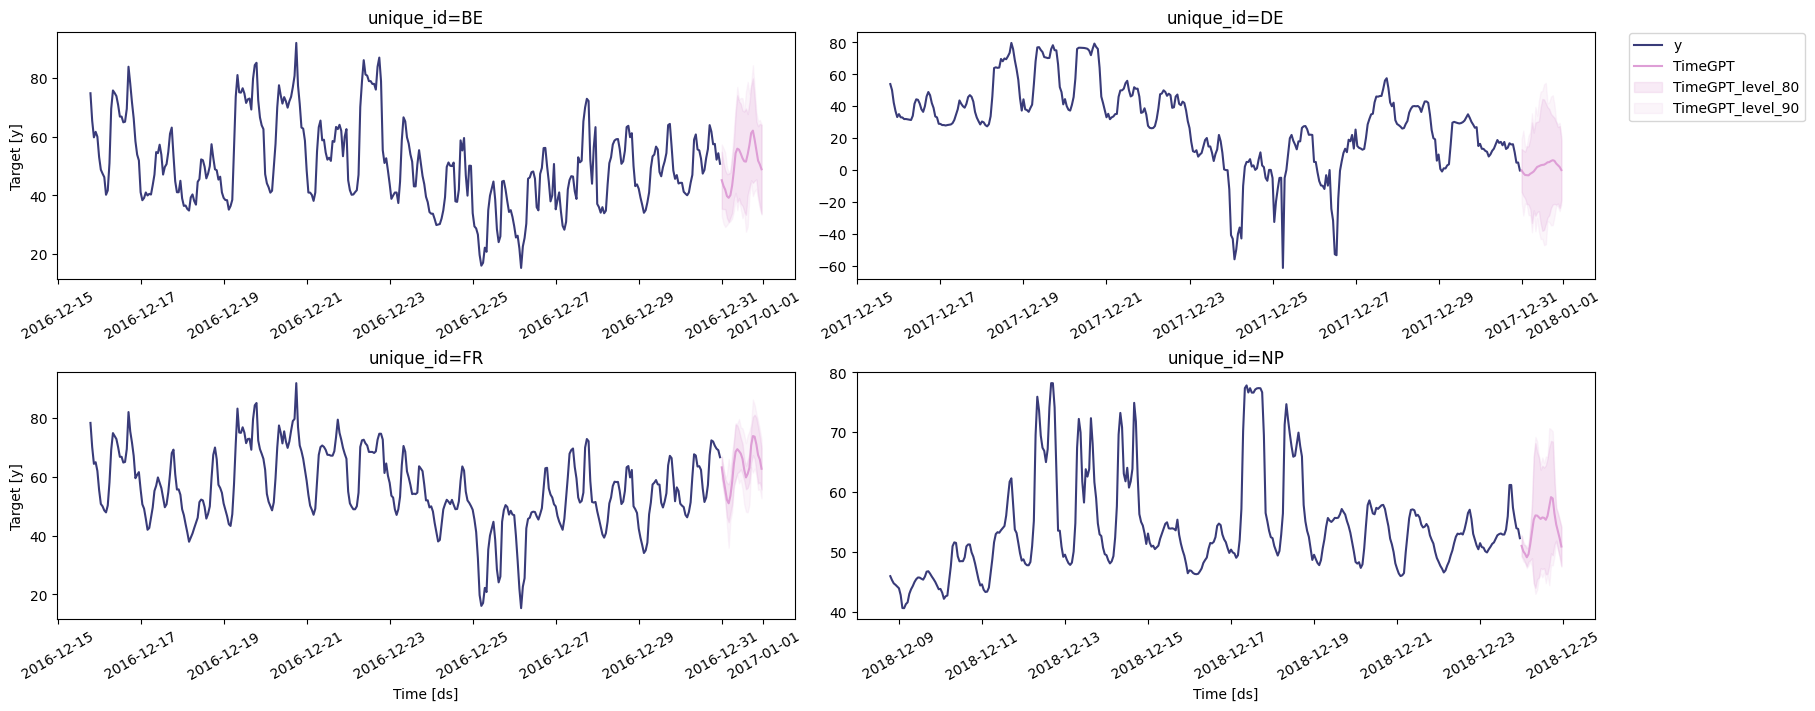

In [14]:
# Plot the forecast results
nixtla_client.plot(df, timegpt_fcst_multiseries_df, max_insample_length=365, level=[80, 90])

In [15]:
# Historical Forecasts
# Adding historical forecasts with confidence intervals
timegpt_fcst_multiseries_with_history_df = nixtla_client.forecast(
    df=df, h=24, level=[80, 90], add_history=True
)

In [16]:
# Display historical forecast results
timegpt_fcst_multiseries_with_history_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,BE,2016-10-27 00:00:00,56.072560,98.19364,110.134380,13.951481,2.010740
1,BE,2016-10-27 01:00:00,52.413048,94.53413,106.474870,10.291969,-1.648771
2,BE,2016-10-27 02:00:00,52.805850,94.92693,106.867670,10.684772,-1.255968
3,BE,2016-10-27 03:00:00,52.581253,94.70233,106.643074,10.460175,-1.480566
4,BE,2016-10-27 04:00:00,52.667156,94.78824,106.728970,10.546078,-1.394663


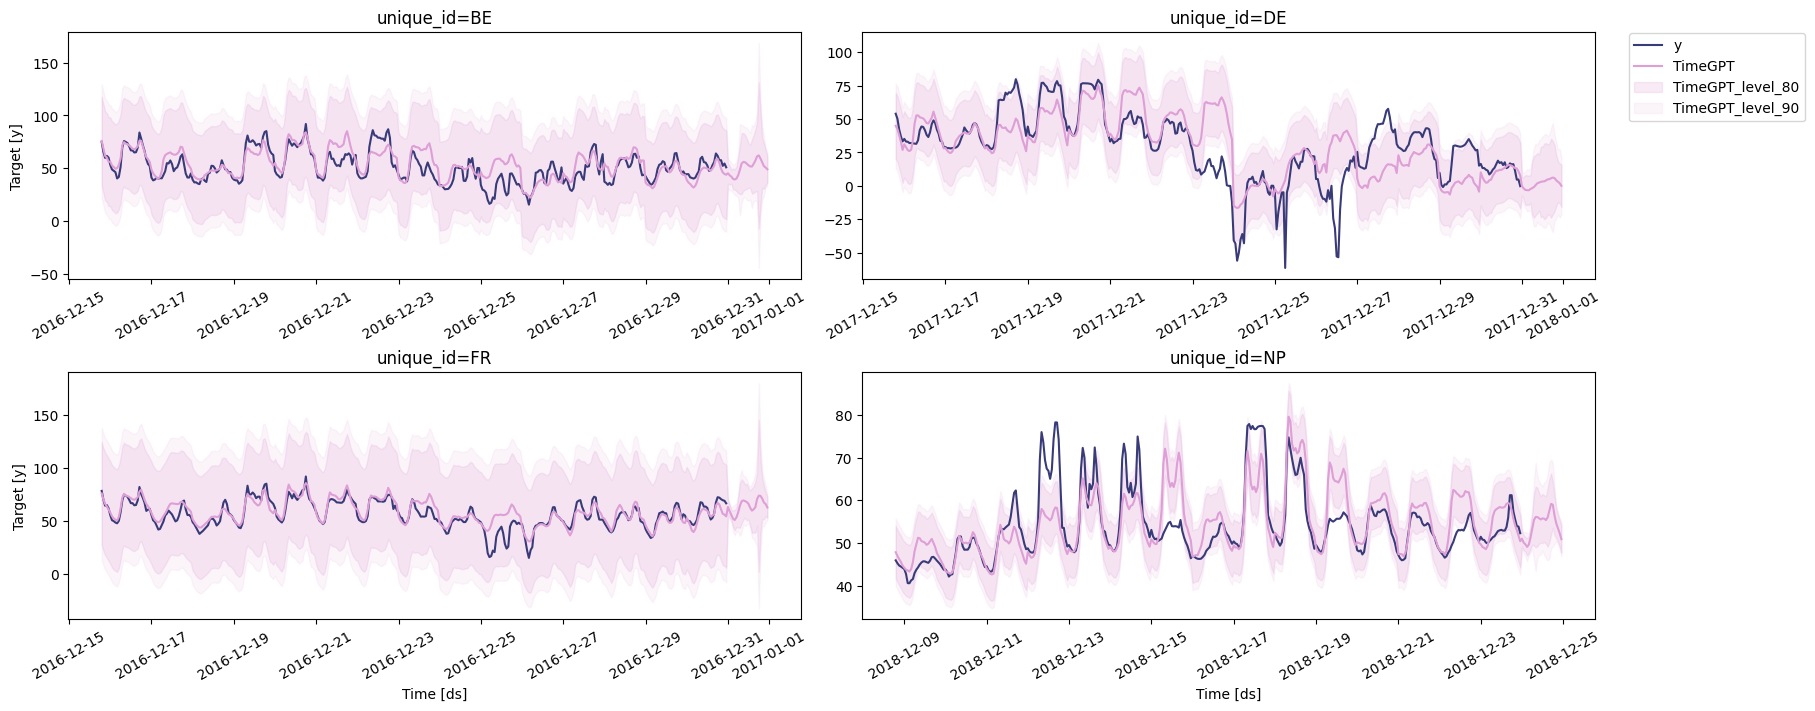

In [17]:
# Plot the historical forecasts
nixtla_client.plot(
    df,
    timegpt_fcst_multiseries_with_history_df.groupby('unique_id').tail(365 + 24),
    max_insample_length=365,
    level=[80, 90],
)